In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap as Basemap
import os
from pathlib import Path

### Data folder

In [4]:
data_folder = '../Data/info - fluxes/EU/'
data_folder = '~/Desktop/Tweet2Geo/Data/Europe/'
data_folder = '/home/veror/Desktop/Tweet2Geo/Data/Europe/'

In [3]:
cwd = Path.cwd()
parent_dir = cwd.parent.parent

parent_dir

PosixPath('/home/veror/Desktop/Tweet2Geo')

### Create directed weighted network

In [4]:
# network df
#
network_df = pd.read_csv(parent_dir / 'Data' / 'Europe' / 'source_target_norm_day_ok.csv')

# create degree graph

DG = nx.DiGraph()

for index, row in network_df.iterrows():
    if row['weight'] != 0:
        source = row['source']
        target = row['target']
        weight = row['weight']
        DG.add_edge(source, target, weight=weight)

edge_weights = [DG[u][v]['weight']/100 for u, v in DG.edges()]

### Compute degree

In [5]:
# DEGREE

# in and out degree
indegree_dict = dict(DG.in_degree(weight='weight'))
outdegree_dict = dict(DG.out_degree(weight='weight'))

# degree df
country_list = indegree_dict.keys()
in_list = []
out_list = []
tot_list = []

degree_df = pd.DataFrame(columns=['country', 'outdegree', 'indegree'], index=country_list)

for node, indegree in indegree_dict.items():
    degree_df.at[node, 'indegree'] = indegree
for node, outdegree in outdegree_dict.items():
    degree_df.at[node, 'outdegree'] = outdegree
degree_df['country'] = country_list

degree_df['total degree'] = degree_df['indegree'] + degree_df['outdegree']

#degree_df.to_csv(parent_dir / 'Data' / 'Europe' / 'degree EU.csv')

### Network measures

In [6]:
# NETWORK MEASURES

degree_centrality = nx.degree_centrality(DG)
closeness_centrality = nx.closeness_centrality(DG)
betweenness_centrality = nx.betweenness_centrality(DG)
clustering_coefficient = nx.average_clustering(DG)
density = nx.density(DG)

print(f"Degree centrality: {degree_centrality}")
print(f"Closeness centrality: {closeness_centrality}")
print(f"Betweenness centrality: {betweenness_centrality}")
print(f"Clustering coefficient: {clustering_coefficient}")
print(f"Network density: {density}") #todo normalization check

#todo sophisticated

Degree centrality: {'AL': 1.5454545454545454, 'AT': 1.8181818181818183, 'BY': 1.1818181818181819, 'BE': 1.7727272727272727, 'BA': 1.2272727272727273, 'BG': 1.5681818181818181, 'HR': 1.6590909090909092, 'CZ': 1.5454545454545454, 'DK': 1.5227272727272727, 'EE': 1.3636363636363638, 'FI': 1.4772727272727273, 'FR': 1.5, 'DE': 1.6136363636363638, 'VA': 1.25, 'HU': 1.6136363636363638, 'IS': 1.4090909090909092, 'IE': 1.7727272727272727, 'IT': 1.5681818181818181, 'LV': 1.1363636363636365, 'LT': 1.5, 'LU': 1.3181818181818181, 'MK': 1.2272727272727273, 'MT': 1.3863636363636365, 'MD': 1.6590909090909092, 'ME': 1.3181818181818181, 'NL': 1.5681818181818181, 'NO': 1.7045454545454546, 'PL': 1.590909090909091, 'PT': 1.590909090909091, 'RO': 1.5227272727272727, 'RU': 1.5, 'SM': 1.1136363636363638, 'RS': 1.2727272727272727, 'SK': 1.5681818181818181, 'SI': 1.340909090909091, 'ES': 1.7045454545454546, 'SE': 1.6136363636363638, 'CH': 1.8181818181818183, 'TR': 1.2727272727272727, 'UA': 1.5454545454545454, 'G

### Map

In [7]:
# map

plt.figure(figsize = (10,10))

m = Basemap(width=6000000,height=5000000,
            resolution='l',projection='laea',\
            lat_0=54,lon_0=19,\
            )

<Figure size 1000x1000 with 0 Axes>

In [8]:
# set lat - lon

lat_lon_df = pd.read_csv(parent_dir / 'Data' / 'Europe' / 'lat_lon_EU.csv')

mx, my = m(lat_lon_df['lon'].values, lat_lon_df['lat'].values)

lon_mer = []
lat_mer = []

pos = {}

for count, elem in enumerate (lat_lon_df['ISO 2']):

 pos[elem] = (mx[count], my[count])

In [9]:
# set degree df

degree_df = pd.read_csv(parent_dir / 'Data' / 'Europe' / 'degree EU.csv')

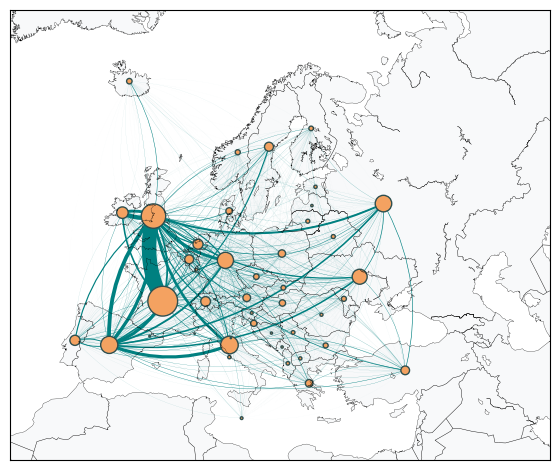

In [10]:
# in-strenght map

m.fillcontinents(color='#f8f9fa')

nx.draw_networkx_nodes(G = DG, pos = pos, node_color = '#f4a261', alpha = 1, node_size = degree_df['indegree']/2, edgecolors='darkslategray')
nx.draw_networkx_edges(G = DG, pos = pos, edge_color='teal', alpha=1, width=np.array(edge_weights).astype(float)*2, arrowstyle='-', arrowsize=5, connectionstyle = 'arc3,rad=0.2', min_source_margin=0, min_target_margin=0, node_size = degree_df['indegree']/2)

m.drawcountries(linewidth = 0.3)

m.drawcoastlines(linewidth=0.2)

plt.tight_layout()

plt.savefig(parent_dir / 'Data analysis' / 'Network measures' / 'in_strength_EU.pdf')

plt.show()

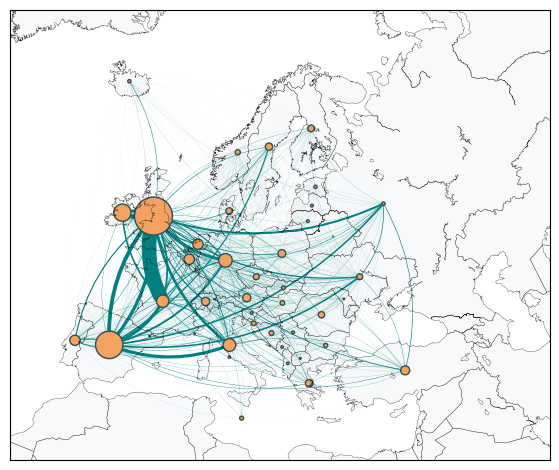

In [11]:
# out-strenght map

m.fillcontinents(color='#f8f9fa')

nx.draw_networkx_nodes(G = DG, pos = pos, node_color = '#f4a261', alpha = 1, node_size = degree_df['outdegree']/2, edgecolors='darkslategray')
nx.draw_networkx_edges(G = DG, pos = pos, edge_color='teal', alpha=1, width=np.array(edge_weights).astype(float)*2, arrowstyle='-', connectionstyle = 'arc3,rad=0.2', min_source_margin=0, min_target_margin=0, node_size = degree_df['outdegree']/2)

m.drawcountries(linewidth = 0.3)

m.drawcoastlines(linewidth=0.2)

plt.tight_layout()

plt.savefig(parent_dir / 'Data analysis' / 'Network measures' / 'out_strength_EU.pdf')

plt.show()